In [1]:
# Importing the libraries.
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci

In [2]:
#Define the step function
def step_func(z):
    return 1.0 if (z >= 0) else -1.0

In [3]:
#Defining the perceptron algorithm
def perceptron(X, Y, theta, epochs, learning_rate=1):
    loss_progression = []
    iterations = []
    perc_losses = []
    for epoch in range(epochs):
        missed_samples = 0
        perc_loss_sum = 0
        for index, sample in enumerate(X):
            sample = np.insert(sample, 0, 1).reshape(-1,1)
            prod_vec = np.dot(sample.T, theta)
            predicted = step_func(prod_vec)
            if Y[index] != predicted:
                theta += learning_rate*Y[index]*sample
                perc_loss_sum += Y[index]*prod_vec
                missed_samples += 1
        loss = missed_samples/X.shape[0]
        perc_loss = -(perc_loss_sum)/X.shape[0]
        perc_losses.append(perc_loss)
        loss_progression.append(loss)
        iterations.append(epoch)

        #Logs:
        print("Iteration: ", epoch, "Perceptron Loss: ", perc_loss, " Classification Loss: ", loss)
    return theta, loss_progression, iterations, perc_losses

In [4]:
#Preprocessing Data
dataset = sci.io.loadmat("data3.mat")
dataset = dataset['data']
x1 = [ data[0] for data in dataset ]
x2 = [ data[1] for data in dataset ]
y = [ data[2] for data in dataset ]
x1 = np.array(x1).reshape(-1,1)
x2 = np.array(x2).reshape(-1,1)

#Creating the target set.
y = np.array(y).reshape(-1,1)

## initialize bias and weights
np.random.seed(2)
theta = np.random.randn(3, 1) * 0.03

#Creating the X-feature set.
x = np.concatenate((x1, x2), axis = 1)
theta, loss_progression, iterations, perc_losses = perceptron(x, y, theta, 1000)

Iteration:  0 Perceptron Loss:  [[0.16495957]]  Classification Loss:  0.355
Iteration:  1 Perceptron Loss:  [[0.10847585]]  Classification Loss:  0.34
Iteration:  2 Perceptron Loss:  [[0.07246599]]  Classification Loss:  0.28
Iteration:  3 Perceptron Loss:  [[0.05191109]]  Classification Loss:  0.24
Iteration:  4 Perceptron Loss:  [[0.04026722]]  Classification Loss:  0.2
Iteration:  5 Perceptron Loss:  [[0.02770615]]  Classification Loss:  0.14
Iteration:  6 Perceptron Loss:  [[0.02476703]]  Classification Loss:  0.11
Iteration:  7 Perceptron Loss:  [[0.02238538]]  Classification Loss:  0.11
Iteration:  8 Perceptron Loss:  [[0.01439587]]  Classification Loss:  0.05
Iteration:  9 Perceptron Loss:  [[0.00669653]]  Classification Loss:  0.02
Iteration:  10 Perceptron Loss:  [[0.00258248]]  Classification Loss:  0.01
Iteration:  11 Perceptron Loss:  [[0.00683779]]  Classification Loss:  0.02
Iteration:  12 Perceptron Loss:  [[0.00326398]]  Classification Loss:  0.02
Iteration:  13 Percept

Text(0.5, 1.0, 'Binary Classification Error Graph (up to 200 iterations)')

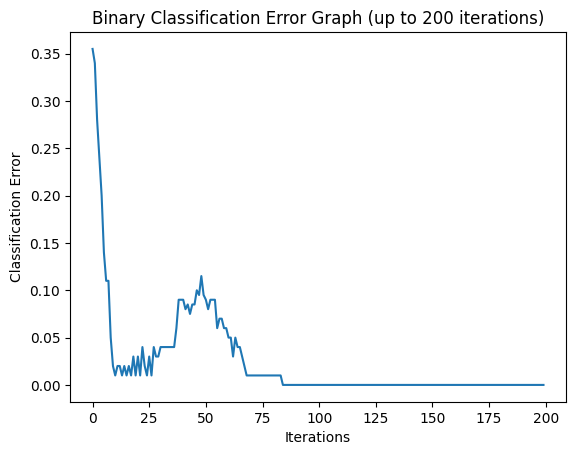

In [7]:
#Binary Classification Error vs Iteration Graph
"""
This is a zoomed plot upto 200 iterations.
"""
plt.plot(iterations[0:200], loss_progression[0:200])
plt.xlabel("Iterations")
plt.ylabel("Classification Error")
plt.title("Binary Classification Error Graph (up to 200 iterations)")

Text(0.5, 1.0, 'Perceptron Error vs Iterations (up to 200 iterations)')

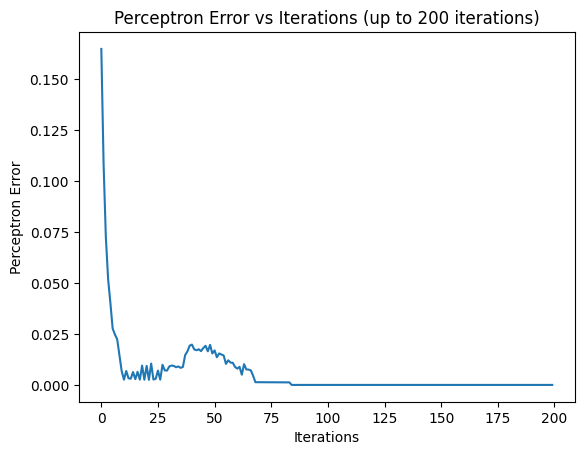

In [8]:
#Perceptron Error vs Iteration Graph
"""
This is a zoomed plot upto 200 iterations.
"""
plt.plot(iterations[0:200], perc_losses[0:200])
plt.xlabel("Iterations")
plt.ylabel("Perceptron Error")
plt.title("Perceptron Error vs Iterations (up to 200 iterations)")

In [7]:
from cProfile import label
def plot_decision_boundary(X, theta):
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -theta[1]/theta[2]
    c = -theta[0]/theta[2]
    x2 = m*x1 + c 
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plot1, = plt.plot(X[:, 0], X[:, 1], "r*", label='Data points')
    plot2, = plt.plot(x1, x2, 'b-', label="Decision Boundary")
    plt.xlabel("X1")
    plt.title("Decision Boundary")
    plt.ylabel("X2")
    plt.legend(handles=[plot1, plot2])

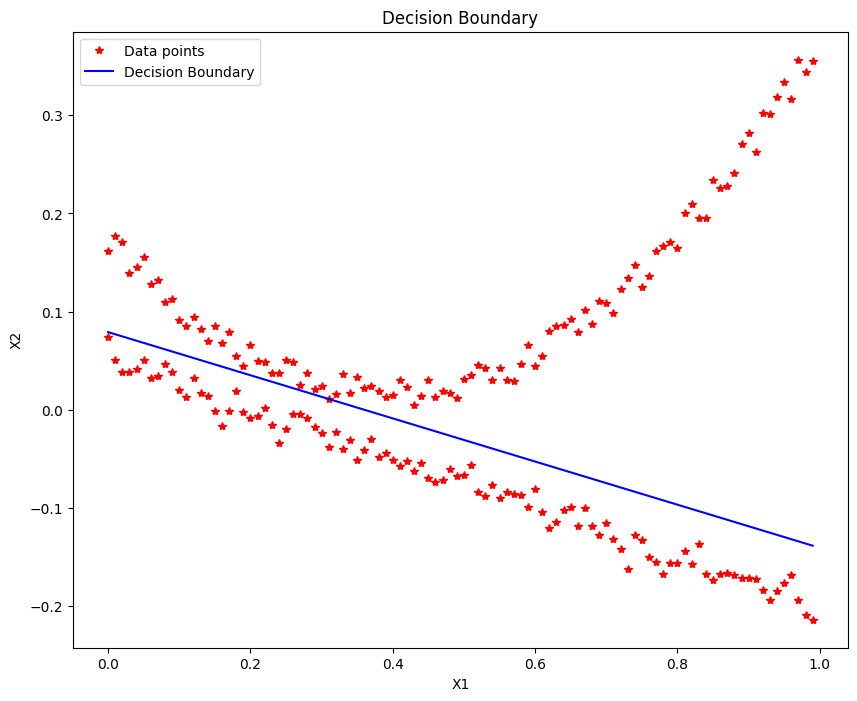

In [8]:
#Decision Boundary
plot_decision_boundary(x, theta)